# Libraries

In [277]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from plotnine import *

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 

# Preprocessing

In [278]:
deployDF = pd.read_csv("deploy.csv")
trainingDF = pd.read_csv("training.csv")

In [279]:
deployDF.head()

,Velo,SpinRate,HorzBreak,InducedVertBreak
0,94.72,2375.0,3.10,18.15
1,95.25,2033.0,11.26,14.50
2,92.61,2389.0,11.00,21.93
3,94.94,2360.0,6.84,18.11
4,97.42,2214.0,16.70,13.38


In [280]:
trainingDF.head()

,InPlay,Velo,SpinRate,HorzBreak,InducedVertBreak
0,0,95.33,2893.0,10.68,21.33
1,0,94.41,2038.0,17.13,5.77
2,0,90.48,2183.0,6.61,15.39
3,0,93.04,2279.0,9.33,14.57
4,0,95.17,2384.0,6.99,17.62


In [281]:
deployDF.dropna(inplace = True)
trainingDF.dropna(inplace = True)

print("DShape: ", deployDF.shape)
print("TShape: ", trainingDF.shape)

DShape:  (9987, 4)
TShape:  (9994, 5)


# Model Construction

In [283]:
predictors = ["Velo", "SpinRate", "HorzBreak", "InducedVertBreak"]
y = trainingDF["InPlay"]

X_train, X_test, y_train, y_test = train_test_split(trainingDF[predictors], y, test_size = 0.3)

zScore = StandardScaler()
X_train = zScore.fit_transform(X_train)
X_test = zScore.transform(X_test)

logit = LogisticRegression(penalty = "none")
logit.fit(X_train, y_train)

print("train accuracy: ", accuracy_score(y_train,logit.predict(X_train)))
print("test accuracy: ", accuracy_score(y_test,logit.predict(X_test)))

train accuracy:  0.7252323087919943
test accuracy:  0.7342447482494164


In [284]:
deployDF[predictors] = zScore.fit_transform(deployDF)

probPredictions = logit.predict_proba(deployDF)[:,1]
deployDF["InPlayProbability"] = probPredictions
deployDF.head()

,Velo,SpinRate,HorzBreak,InducedVertBreak,InPlayProbability
0,0.304726,0.688953,-1.271389,0.868354,0.225852
1,0.507950,-1.063964,0.350152,0.072996,0.271904
2,-0.504337,0.760710,0.298485,1.692039,0.225763
3,0.389083,0.612071,-0.528183,0.859638,0.230600
4,1.340020,-0.136251,1.431179,-0.171058,0.266252


In [292]:
deployDF.to_csv("probabilities.csv")

# Visuals 

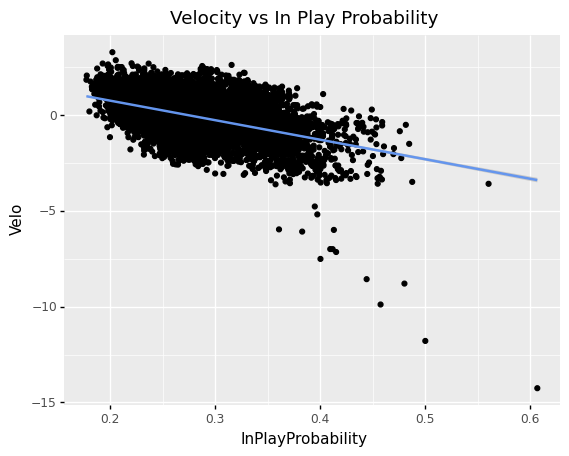

<ggplot: (8774207211798)>

In [286]:
(ggplot(deployDF, aes(x = "InPlayProbability", y = "Velo")) +
geom_point() +
geom_smooth(color = "cornflowerblue") +
ggtitle("Velocity vs In Play Probability"))

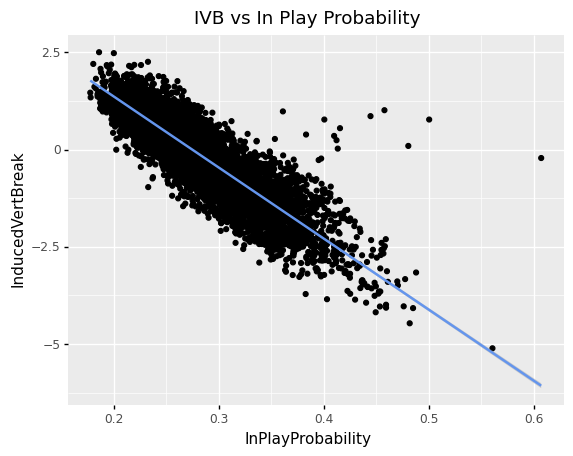

<ggplot: (8774205529122)>

In [287]:
(ggplot(deployDF, aes(x = "InPlayProbability", y = "InducedVertBreak")) +
geom_point() +
geom_smooth(color = "cornflowerblue") +
ggtitle("IVB vs In Play Probability"))

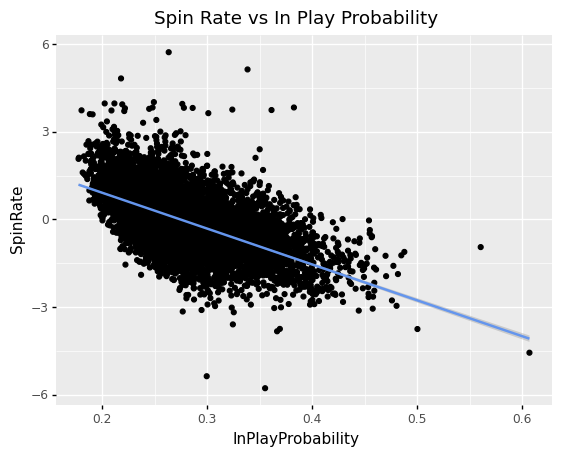

<ggplot: (8774206017859)>

In [288]:
(ggplot(deployDF, aes(x = "InPlayProbability", y = "SpinRate")) +
geom_point() +
geom_smooth(color = "cornflowerblue") +
ggtitle("Spin Rate vs In Play Probability"))

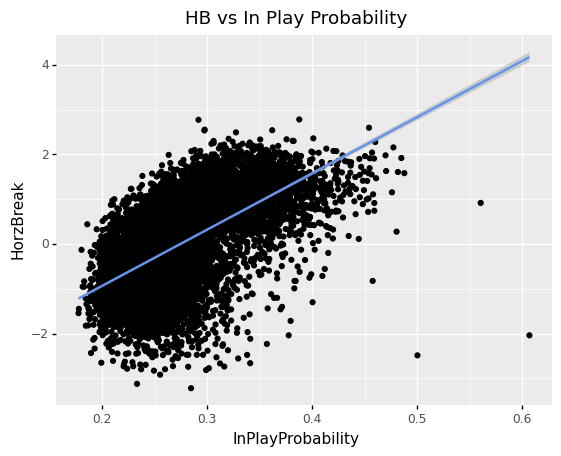

<ggplot: (8774174751594)>

In [289]:
(ggplot(deployDF, aes(x = "InPlayProbability", y = "HorzBreak")) +
geom_point() +
geom_smooth(color = "cornflowerblue") +
ggtitle("HB vs In Play Probability"))